In [8]:
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso,LassoCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rc("font", family='Microsoft YaHei')
# plt.rcParams['font.sans-serif'] = 'SimHei' 
plt.rcParams['axes.unicode_minus'] = False

# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [10]:
data = pd.read_excel('./data/清洗数据-0714.xlsx')
data = data[data['年龄']>60]

In [11]:
dingliang_set = {"舒张压", "收缩压", "LDL-C检测值", "HDL-C检测值", "空腹血糖检测值", "最高值肌酐检测值", 
                  "首次血红蛋白检测值", "CK-MB最高值检测值","肌钙蛋白T最高值检测值","肌红蛋白最高值检测值",
                  "BNP检测值","NT-proBNP检测值","LVEF","乳酸脱氢酶最高值检测值.2","TyG指数","TG/HDL"}
dingxing_set = {"脑血管病史", "合并糖尿病", "室壁瘤.1", "附壁血栓", "室壁瘤", "其他出血事件", "首次心功能分级", 
                 "LM_LAD_LCX_RCA"}
total_element = dingliang_set.union(dingxing_set)
element_size = len(total_element)

# sub_set = ["舒张压", "收缩压", "LDL-C检测值", "HDL-C检测值", "空腹血糖检测值", "最高值肌酐检测值", 
#           "首次血红蛋白检测值", "CK-MB最高值检测值","肌钙蛋白T最高值检测值","肌红蛋白最高值检测值",
#           "BNP检测值","NT-proBNP检测值","LVEF","乳酸脱氢酶最高值检测值.2","TyG指数","TG/HDL",
#            # 定性分析
#           "脑血管病史", "合并糖尿病", "附壁血栓", "室壁瘤", "其他出血事件", "首次心功能分级", 
#           "LM_LAD_LCX_RCA"]
sub_set = ["肌红蛋白最高值检测值","TyG指数","TG/HDL","LVEF",
           "合并糖尿病","收缩压","LDL-C检测值","TG检测值","空腹血糖检测值",
           "首次血红蛋白检测值","CK-MB最高值检测值","肌钙蛋白I最高值检测值","HDL-C检测值",
           # 定性分析 "HDL-C检测值", "肌钙蛋白T最高值检测值","室壁瘤","附壁血栓",  "其他出血事件", 
          "脑血管病史",  "首次心功能分级", 
          "LM_LAD_LCX_RCA"]
# sub_set = ['TG/HDL', 'LM_LAD_LCX_RCA', '舒张压', '首次心功能分级', 'CK-MB最高值检测值', 'LVEF']
multi_logi_df = data[sub_set]

In [12]:
# 定性分析
multi_logi_df['脑血管病史'] = multi_logi_df['脑血管病史'].apply(lambda x: 1 if x == "是" else 0)
multi_logi_df['合并糖尿病'] = multi_logi_df['合并糖尿病'].apply(lambda x: 1 if x == True else 0)
# multi_logi_df['附壁血栓'] = multi_logi_df['附壁血栓'].apply(lambda x: 1 if x == "是" else 0)
# multi_logi_df['室壁瘤'] = multi_logi_df['室壁瘤'].apply(lambda x: 1 if x == "是"  else 0)
# multi_logi_df['其他出血事件'] = multi_logi_df['其他出血事件'].apply(lambda x: 1 if x == "是" else 0)
multi_logi_df['首次心功能分级'] = multi_logi_df['首次心功能分级'].apply(lambda x: 1 if x!= "Ⅰ级" else 0)
multi_logi_df['LM_LAD_LCX_RCA'] = multi_logi_df['LM_LAD_LCX_RCA'].apply(lambda x: 1 if x != "单支" else 0)



# 定量分析
for col_name in multi_logi_df.columns:
    if col_name in sub_set:
        # print(col_name)
        multi_logi_df[col_name] = multi_logi_df[col_name].fillna(value=multi_logi_df[col_name].mean())
        
multi_logi_df = multi_logi_df.rename(
    {
     "合并糖尿病":"糖尿病",
     "脑血管病史":"脑血管病",  
     "收缩压":"收缩压",
     "LDL-C检测值":"LDL-C",
     "TG检测值":"TG",
     "空腹血糖检测值":"FBG",
     "首次血红蛋白检测值":"Hb",
     "CK-MB最高值检测值":"CK-MB",
     "肌钙蛋白I最高值检测值":"肌钙蛋白I",
     "肌红蛋白最高值检测值":"MYO",
     "BNP检测值":"BNP",
     "TyG指数":"TyG指数",
     "TG/HDL":"TG/HDL",
     "LVEF":"LVEF(%)",
     "首次心功能分级":"Killip分级", 
      "LM_LAD_LCX_RCA":"血管病变",
        
        
    "肌钙蛋白T最高值检测值":"肌钙蛋白T",
     "HDL-C检测值":"HDL-C",
           # 定性分析
     "附壁血栓":"附壁血栓", 
     "室壁瘤":"室壁瘤", 
     "其他出血事件":"其他出血事件" },axis=1)
        
data_Y = data['mace']
train_X,test_X,train_y,test_y = train_test_split(multi_logi_df,data_Y,test_size=0.3,random_state=5)
mm = MinMaxScaler() 
train_data_m = mm.fit_transform(train_X) #注意fit_transform() 和 transform()的区别 用同一套归一化参数
test_data_m = mm.transform(test_X) 

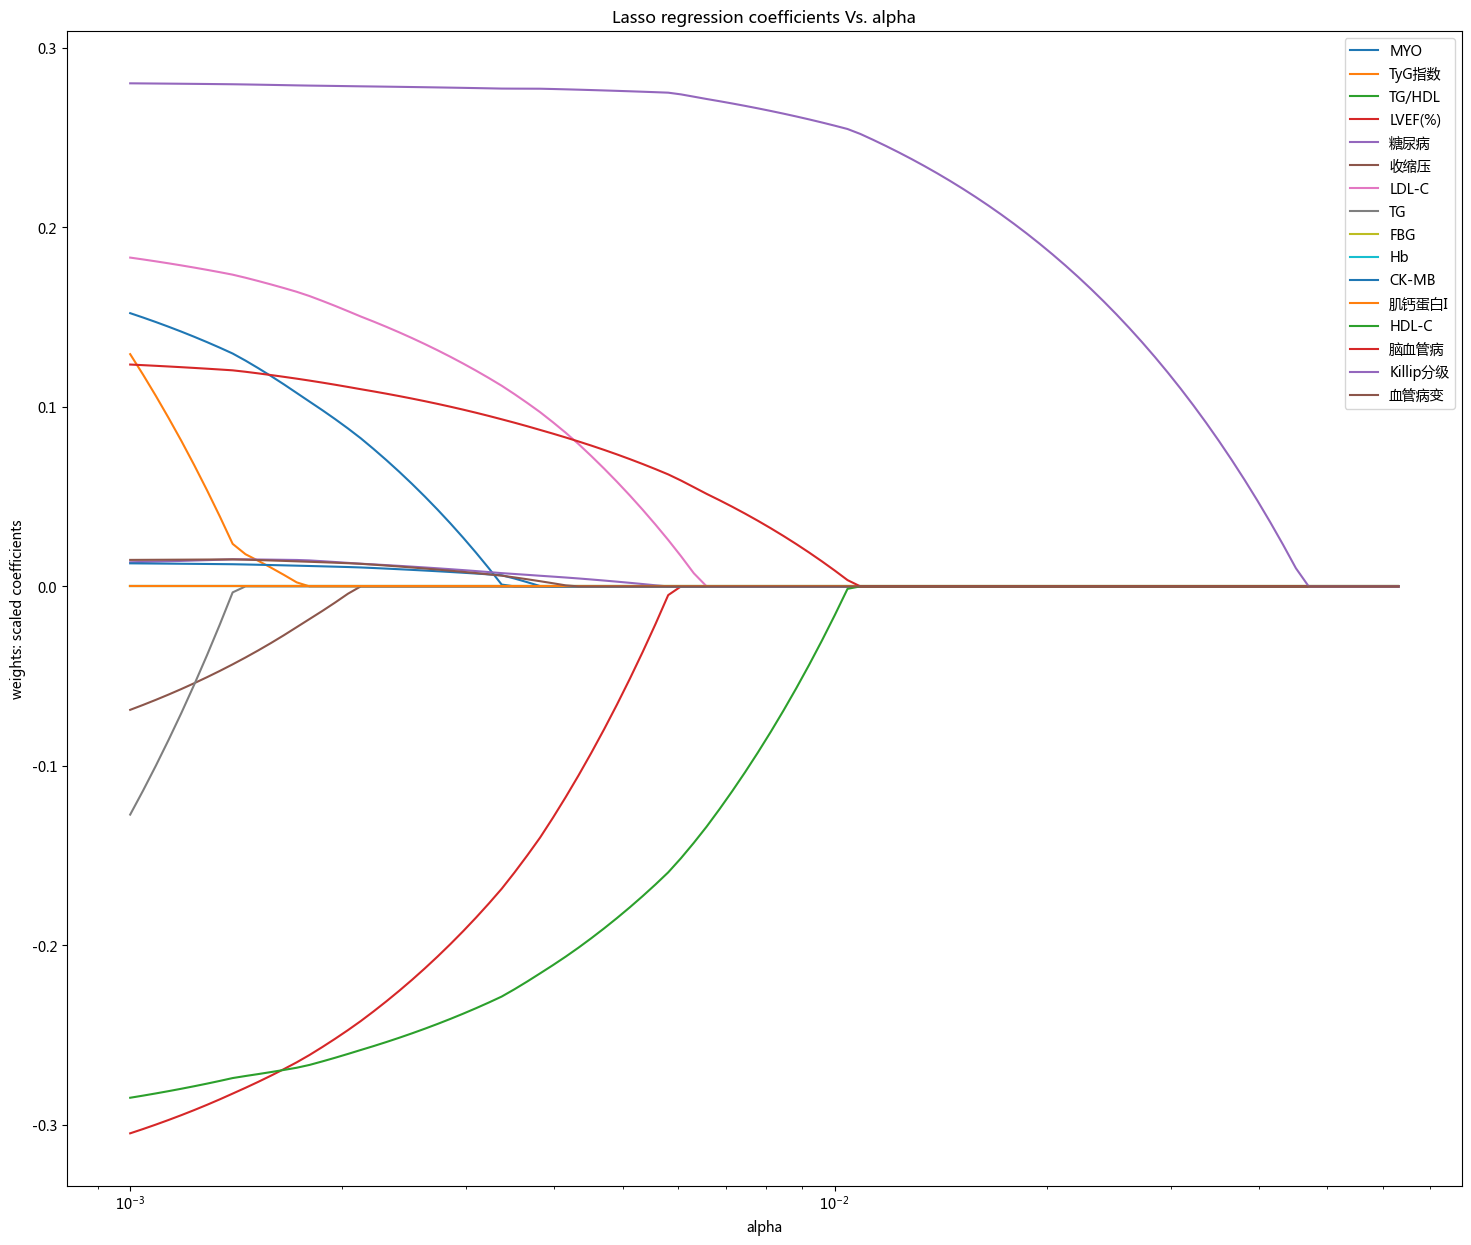

In [13]:
alpha_lasso = 10**np.linspace(-3,-1.2,100)
lasso = Lasso(alpha=0.0006)
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha=i)
    lasso.fit(train_data_m, train_y)
    coefs_lasso.append(lasso.coef_)
    
plt.figure(figsize=(18,15))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(train_X.columns,loc="upper right")
# plt.legend.loc(2)
plt.show()
# plt.savefig('../0720/实验结果/lasso回归图.png')

In [14]:
from sklearn.linear_model import LassoCV
# 使用LassoCV进行特征选择
lassocv = LassoCV(cv=20)
lassocv.fit(train_data_m, train_y)

LassoCV(cv=20)

In [15]:
print(f'Best alpha: {lassocv.alpha_}')

Best alpha: 0.0026651473155937535


In [16]:
lasso = Lasso(alpha=0.002665147315593748)
model_lasso = lasso.fit(train_data_m, train_y)
coef = pd.Series(model_lasso.coef_,index=train_X.columns)
print(coef[coef != 0].abs().sort_values(ascending = False))

Killip分级    0.278054
HDL-C       0.245334
LVEF(%)     0.210106
LDL-C       0.133587
脑血管病        0.102568
MYO         0.047064
糖尿病         0.010358
血管病变        0.009712
CK-MB       0.008664
dtype: float64


In [17]:
matplotlib.matplotlib_fname()

'/Users/baitiangang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'

In [18]:
matplotlib.get_cachedir()

'/Users/baitiangang/.matplotlib'

In [19]:
coef

MYO         0.047064
TyG指数       0.000000
TG/HDL      0.000000
LVEF(%)    -0.210106
糖尿病         0.010358
收缩压        -0.000000
LDL-C       0.133587
TG         -0.000000
FBG         0.000000
Hb         -0.000000
CK-MB       0.008664
肌钙蛋白I      -0.000000
HDL-C      -0.245334
脑血管病        0.102568
Killip分级    0.278054
血管病变        0.009712
dtype: float64